c:\Users\zhzjh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\zhzjh\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


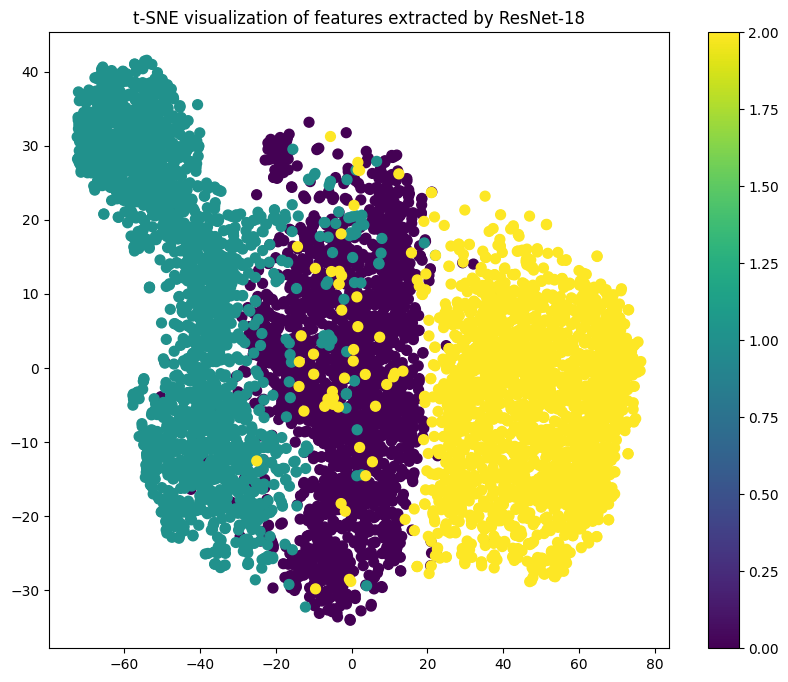

In [1]:
import torch
from torch import nn
from torchvision import models, transforms, datasets
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# 加载预训练的 ResNet-18 模型
model = models.resnet18(pretrained=True)

# 去除最后的分类层
model = nn.Sequential(*list(model.children())[:-1])

# 转换为评估模式
model.eval()

# 数据预处理
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 加载 Dataset 2（假设 Dataset 2 存在于 './Dataset2/ProstateCancer' 目录）
dataset2 = datasets.ImageFolder(root='./Dataset2/ProstateCancer', transform=transform)

# 创建数据加载器
data_loader = DataLoader(dataset2, batch_size=32, shuffle=False)

# 特征提取函数
def extract_features(model, data_loader, device):
    features = []
    labels = []
    with torch.no_grad():
        for inputs, target in data_loader:
            inputs = inputs.to(device)
            outputs = model(inputs)  # 提取特征
            outputs = outputs.view(outputs.size(0), -1)  # 展平为 2D 张量
            features.append(outputs.cpu().numpy())  # 收集特征
            labels.append(target.cpu().numpy())  # 收集标签
    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0)
    return features, labels

# 将模型移动到 GPU 或 CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# 提取特征
features2, labels2 = extract_features(model, data_loader, device)

# 使用 t-SNE 进行降维
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(features2)

# 可视化 t-SNE 结果
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels2, cmap='viridis', s=50)
plt.colorbar()
plt.title("t-SNE visualization of features extracted by ResNet-18")
plt.show()
